In [47]:
# imports
from supabase import create_client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [20]:
# DB connection
load_dotenv()
supabase = create_client(os.getenv("SUPABASE_URL"), os.getenv("SUPABASE_KEY"))

In [21]:
data = supabase.table("telco_customer_churn_data").select("*").execute()
df = pd.DataFrame(data.data)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   tenure                  1000 non-null   int64  
 2   monthlycharges          1000 non-null   float64
 3   totalcharges            1000 non-null   float64
 4   churn                   1000 non-null   object 
 5   internetservice         1000 non-null   object 
 6   contract                1000 non-null   object 
 7   paymentmethod           1000 non-null   object 
 8   tenure_group            1000 non-null   object 
 9   monthly_charge_segment  1000 non-null   object 
 10  has_internet_service    1000 non-null   int64  
 11  is_multi_line_user      1000 non-null   int64  
 12  contract_type_code      1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [39]:
df.columns

Index(['id', 'tenure', 'monthlycharges', 'totalcharges', 'churn',
       'internetservice', 'contract', 'paymentmethod', 'tenure_group',
       'monthly_charge_segment', 'has_internet_service', 'is_multi_line_user',
       'contract_type_code'],
      dtype='object')

In [37]:
# churn percentage
df[(df['churn'] == 'Yes')]['churn'].count() / len(df) * 100

25.6

In [42]:
# Avg monthlycharges per contract
df.groupby('contract')['monthlycharges'].mean()

contract
Month-to-month    67.297996
One year          68.184069
Two year          63.269838
Name: monthlycharges, dtype: float64

In [46]:
# Count of types of customers
df.groupby('tenure_group')['tenure_group'].count()

tenure_group
Champion    209
Loyal       202
New         321
Regular     268
Name: tenure_group, dtype: int64

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='internetservice', ylabel='Count'>

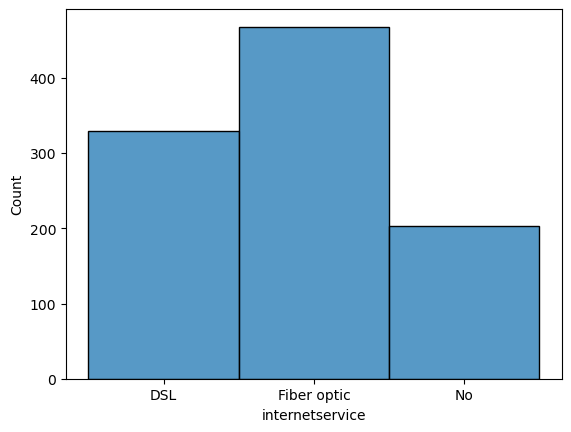

In [49]:
# internet service distribution
sns.histplot(data=df, x='internetservice')

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totalcharges', ylabel='Count'>

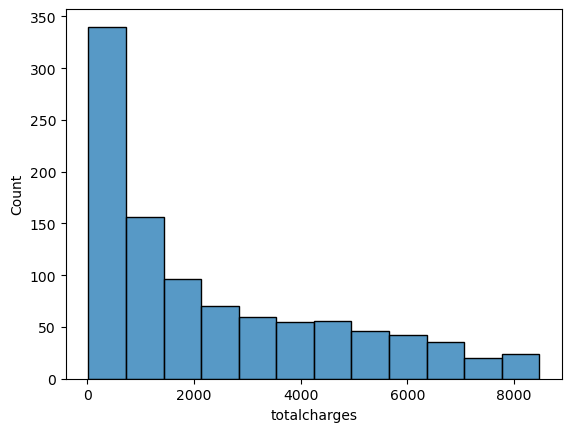

In [54]:
# total charges distribution
sns.histplot(data=df['totalcharges'])

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='contract', ylabel='Count'>

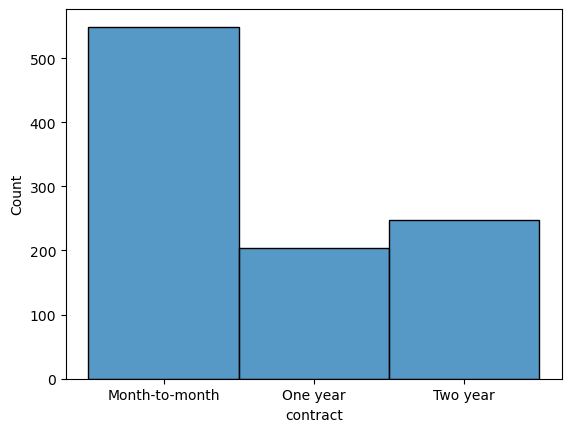

In [56]:
# contract types distribution
sns.histplot(data=df['contract'])

## Save data

In [57]:
df.to_csv('.\data\processed\processed_data.csv')